# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2021

## Project 1 - The Trapped Knight
Due Friday, February 12

### Description

In this project, you will write a computer code to generate a particular sequence of numbers described in the following YouTube video: [The Trapped Knight](https://www.youtube.com/watch?v=RGQe8waGJ4w)

Begin by watching the video and make sure you understand exactly how the sequence is generated. Then continue to implement the code in the 3 parts described below.

### Part 1 - Initialize the board

We will store the chess board in a 2d-array of integers. The size of the board is $(2n+1)$-by-$(2n+1)$, for a given integer $n$. This means the board extends from the center square by $n$ steps in all directions.

The first step is to initialize the board by filling it with the integers described in the video. Finish the implementation of the function definition in the cell below such that it returns this "spiral pattern" for any given input parameter $n$.

An example is given below: for the following input
```julia
board = initialize_board(3)
```
the correct output is
```julia
7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

Test your function for various values of $n$ to make sure it is correct before you continue.

*Hints*:
- Note that since Julia uses 1-based indexing, the center square of the array `board` is given by element `board[n+1,n+1]`.
- After the center $1$ has been placed, there are exactly $n$ "circles" of numbers of increasing radius. This is naturally implemented using a for-loop.
- In each "circle", there are 4 segments going up, left, down, and right. These are also naturally implemented using a sequence of 4 for-loops.

In [12]:
# Initializes the board on a [-n:n]x[-n:n] domain with spiral numbers
#
# Example: initialize_board(2) returns
# 17 16 15 14 13
# 18  5  4  3 12
# 19  6  1  2 11
# 20  7  8  9 10
# 21 22 23 24 25
#
# Inputs:
#  n     = integer size of board to allocate
# Outputs: 
#  board = 2n+1 x 2n+1 integer array filled with spiral numbers


function initialize_board(n)
    
    # We store the chess board in the following Matrix
    A = zeros(Int64, 2n+1, 2n+1)
    
    # The following boolean values allow us to naviagte the chess board
    up = true
    down = true
    left = true
    right = true
    
    # We intialize the chess board with the center and adjacent box filled in
    A[n+1,n+1] = 1
    A[n+1,n+2] = 2
    
    # The following variables allow us to keep track of the iterations left, right, down, and up
    # thorugh each iteration
    up_count = 1          #range(n-1:2:2n)
    left_count = 2            #range(n:2:2n)
    down_count = 2            #range(n:2:2n)
    right_count = 3             #range(n+1:2n)
    
    # We init the value of the box at 2, the starting value on the chess board
    box = 2
    
    # This is the location of the starting place on the chess board upon running the program
    location_row = n+1
    location_col = n+2
    
    # for each circle in the shells of the matrix up to n
    for circle = 1:n
        
        # reset the values at each iteration, i.e. each shell/circle of the matrix
        up = true
        down = true
        left = true
        right = true
        
        # if up is true we traverse the up boxes 
        if up == true
            
            # for each count we traverse the chess board up
            for i = 1:up_count
                
                
                box += 1 # add 1 to the box value at each step
                location_row -= 1 # we substract a row since we are traversing up in the chess board
                A[location_row, location_col] = box # We add the value of the box to the matrix
                
                #println("up ",location_row," ",location_col," $box")
                
                # if the location of the row and col is anyone of the edges we break out of the loop
                if (location_row == 2n+1) && (location_col == 2n+1)
                    break
                end
                
            end
            
            # nevertheless add 2 to the amount we need to traverse up in the next iteration
            up_count += 2
            up = false # set it to false so that it break breaks out
        end
        
        # if left is true we traverse the left boxes 
        if left == true
            
            # for each count we traverse the chess board left
            for i = 1:left_count
                
                box += 1 # add one to the value of the boxes
                location_col -= 1 # subtract one col to move left on chess board
                A[location_row, location_col] = box # set the value of the box in the chess board
                
                #println("right ",location_row," ",location_col," $box")
                
                # if the location of the row and col is anyone of the edges we break out of the loop
                if (location_row == 2n+1) && (location_col == 2n+1)
                    break
                end
                
            end
            
            # add 2 to the value of the left count for each iteration
            left_count += 2
            left = false # set it to false so that it break breaks out
        end

        # if down is true we traverse the left boxes
        if down == true
            
            # for each count we traverse the chess board down
            for i = 1:down_count
                
                box += 1 # add one to the value of the boxes
                location_row += 1 # add one row to move down on chess board
                A[location_row, location_col] = box # set the value of the box in the chess board
                
                #println("down ", location_row," ",location_col," $box")
                
                # if the location of the row and col is anyone of the edges we break out of the loop
                if (location_row == 2n+1) && (location_col == 2n+1)
                    break
                end
                
            end
            
            # add 2 to the value of the down count for each iteration
            down_count += 2
            down = false # set it to false so that it break breaks out           
            
        end
        
        # if right is true we traverse the right boxes
        if right == true
            
            # for each count we traverse the chess board down
            for i = 1:right_count
                
                box += 1 # add one to the value of the boxes
                location_col += 1 # add one col to move right on chess board
                A[location_row, location_col] = box # set the value of the box in the chess board
                
                #println("left ", location_row," ",location_col," $box")
                
                # if the location of the row and col is anyone of the edges we break out of the loop
                if (location_row == 2n+1) && (location_col == 2n+1)
                    break
                end
                
            end
            
            
            right_count += 2 # add 2 to the value of the right count for each iteration 
            right = false  # set it to false so that it break breaks out    
            
        end
        
        
        # if the location of the row and col is anyone of the edges we break out of the loop
        if (location_row == 2n+1) && (location_col == 2n+1)
            break
        end
        
    end    
    
    # return a copy of the chess board (just in case)
    return copy(A)
    
end

initialize_board (generic function with 1 method)

In [13]:
initialize_board(2) # 5x5 Spiral Chess Board

5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

In [14]:
initialize_board(3) # 7x7 Spiral Chess Board

7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49

### Part 2 - Simulate the walk

Next we will write the function to simulate the walk and produce the sequence. This function will take an initialized board as input, and produce a list of numbers as well as the corresponding x- and y-coordinates.

For example, the following input:
```julia
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)
```
should produce the following correct output:
```julia
5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]
```

Again test your code, first using small values of $n$ as shown above, which makes it easier to look at the results and find errors.

*Hints*:
- It is convenient to create another 2d-array of booleans, indicating if a square has been visited or not.
- Make sure you never allow the knight to jump outside the board. That is, the only valid positions are $n$ steps from the center square in either direction

In [15]:
# Simulates the trapped knight walk on a pre-initialized board and returns information about knight walk.
# 
# Inputs: 
#  board    = 2n+1 x 2n+1 integer array filled with spiral numbers
# Outputs: 
#  sequence = integer array containing the sequence of spiral numbers the knight jumped to during walk
#  x_path   = integer array containing the x coordinates of each step of knight walk
#  y_path   = integer array containing the y coordinates of each step of knight walk


function simulate_walk(board)
    
    
    n = Int64((size(board,1) - 1) ÷ 2) 
    new_Board = copy(board)
    new_Board_Bool = falses((2n)+1,(2n)+1) # init a boolean chess board to keep track of our traversment
    
    visited_Box = Int64[] # visited boxes that we add and reset for bookkeeping reasons during each iteration
    chosen_Box = Int64[] # we select these values as the least of the possible states/boxes
    push!(chosen_Box, new_Board[n+1,n+1]) # we init the board with the center
    new_Board_Bool[n+1,n+1] = 1 # we init the boolean board with the center already included
    
    y_cord = Int64[] # y coordinates
    x_cord = Int64[] # x coordinates
    push!(y_cord, 0) # we add the first y-cord
    push!(x_cord, 0) # we add the first x-cord
    
    # we init the location of the row and col
    location_row = n+1 
    location_col = n+1
    
    # stop only if either one of the rows or cols is exactly at 1 
    while !(location_row == 1 || location_col == 1)
        
        # total of eight possible knight configuration moves possible which we check all
        # if the intended box we want to visit is in bounds, we then visit
        # then we add that to the possible list of boxes to pick from at the end
        
        if (checkbounds(Bool, new_Board, location_row+2,location_col+1) 
                && new_Board_Bool[location_row+2,location_col+1] == 0)
            
            push!(visited_Box,new_Board[location_row+2,location_col+1])
            
        end
        
        
        if (checkbounds(Bool, new_Board, location_row+2,location_col-1)
                && new_Board_Bool[location_row+2,location_col-1] == 0)
            
            push!(visited_Box,new_Board[location_row+2,location_col-1])
            
        end
        
        
        if (checkbounds(Bool, new_Board, location_row-2,location_col-1)
                && new_Board_Bool[location_row-2,location_col-1] == 0)

            push!(visited_Box,new_Board[location_row-2,location_col-1])

        end
        
        
        if (checkbounds(Bool, new_Board, location_row-2,location_col+1)
                && new_Board_Bool[location_row-2,location_col+1] == 0)
            
            push!(visited_Box,new_Board[location_row-2,location_col+1])
            
        end
        
        
        if (checkbounds(Bool, new_Board, location_row-1,location_col+2)
                && new_Board_Bool[location_row-1,location_col+2] == 0)
            
            push!(visited_Box,new_Board[location_row-1,location_col+2])
            
        end
        
        
        if (checkbounds(Bool, new_Board, location_row-1,location_col-2)
                && new_Board_Bool[location_row-1,location_col-2] == 0)
        
            push!(visited_Box,new_Board[location_row-1,location_col-2])

        end
        
        
        if (checkbounds(Bool, new_Board, location_row+1,location_col+2)
                && new_Board_Bool[location_row+1,location_col+2] == 0)
            
            push!(visited_Box,new_Board[location_row+1,location_col+2])
            
        end
        
        
        if (checkbounds(Bool, new_Board, location_row+1,location_col-2) 
                && new_Board_Bool[location_row+1,location_col-2] == 0)
            
            push!(visited_Box,new_Board[location_row+1,location_col-2])
            
        end
        
        # just in case the length of visited box (which does happen) is 0, 
        # we break out, this implies that theres no possible state or box to visit
        if length(visited_Box) == 0
            break
        end
        
        # we choose the min of the visited boxes or states
        min = minimum(visited_Box)
        
        # add the min to the chosen box 
        push!(chosen_Box,min)
        
        # store the location of the row and col of the chosen val / min 
        location_row = indexin(min,new_Board)[1][1]
        location_col = indexin(min,new_Board)[1][2]
        
        # add the location of the chosen value to the boolean matrix
        new_Board_Bool[location_row,location_col] = 1
        
        # add those values as the x-cords and y-cords list
        push!(x_cord, location_col-(n+1))
        push!(y_cord, location_row-(n+1))
        
        # we reset the visited box for each iteration
        visited_Box = []
        
    end
    
    return copy(chosen_Box), copy(x_cord), copy(y_cord)

end

simulate_walk (generic function with 1 method)

In [16]:
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)

5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]


### Part 3 - Generate the full sequence and plot the path

Finally, use your code to generate the full sequence ($n=100$ is sufficient), output the *last* number, and plot the path by straight lines between all the visited x,y-coordinates.

In [17]:
a = initialize_board(100);
seq, xss, yss = simulate_walk(a);
println("The last digit in the sequence is: ", seq[end])

The last digit in the sequence is: 2084


In [18]:
#=
import Pkg;
Pkg.add("Plots");
=#

In [19]:
#=
import Pkg;
Pkg.add("PyPlot");
=#

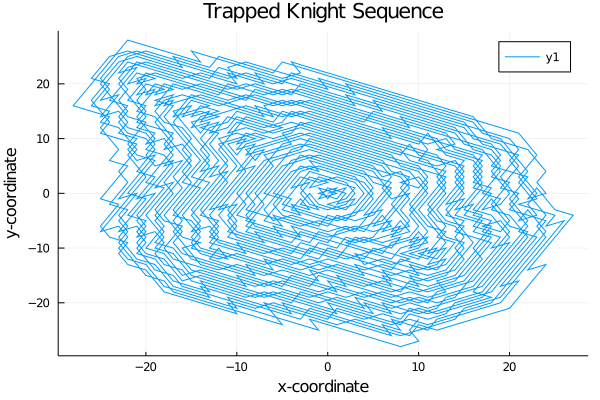

In [20]:

using Plots;

Plots.plot(xss, yss, xlabel="x-coordinate", ylabel="y-coordinate", title = "Trapped Knight Sequence")



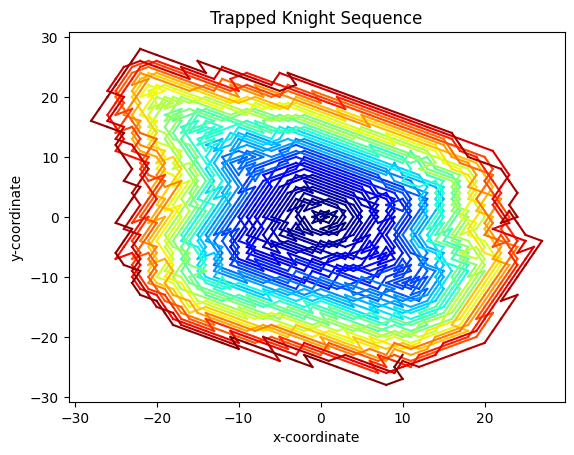

In [22]:
using PyPlot

cm = get_cmap(:jet)

PyPlot.title("Trapped Knight Sequence")
PyPlot.xlabel("x-coordinate")
PyPlot.ylabel("y-coordinate")

for i = 1:(length(xss)-1)
    PyPlot.plot(xss[i:i+1], yss[i:i+1], color = cm(((i-1)/(length(xss)-2))));
end
